In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Datasets

In [69]:
class Dataset():
    def __init__(self, dataset_name, **kwargs):
        self.dataset_name_pool = ['circles', 'moons', 'blobs', "lines", "rand"]
        self.n_classes = 0;
        self.X, self.y = self.get_data(dataset_name, **kwargs)

    def get_data(self, dataset_name, **kwargs):
        assert dataset_name.lower() in self.dataset_name_pool, "Please check your dataset name."

        if (dataset_name == 'circles'):
            X, y = datasets.make_circles(n_samples=kwargs['n_samples'],
                                         factor=kwargs['factor'],
                                         noise=kwargs['noise'])
            self.n_classes = 2
        elif (dataset_name == 'moons'):
            X, y = datasets.make_moons(n_samples=kwargs['n_samples'],
                                       shuffle=kwargs['shuffle'],
                                       noise=kwargs['noise'],
                                       random_state=kwargs['random_state'])
            self.n_classes = 2
        elif (dataset_name == "blobs"):
            X, y = datasets.make_blobs(n_samples=kwargs['n_samples'],
                                       n_features=kwargs['n_features'],
                                       centers=kwargs['centers'],
                                       cluster_std=kwargs['cluster_std'])
            self.n_classes = 3

        elif (dataset_name == "lines"):
            X, y = datasets.make_classification(n_samples=kwargs['n_samples'],
                                                n_features=kwargs['n_features'],
                                                n_redundant=kwargs['n_redundant'],
                                                n_informative=kwargs['n_informative'],
                                                n_clusters_per_class=kwargs['n_clusters_per_class'],
                                                n_classes=kwargs['n_classes'])
            self.n_classes = 3

        return X, y

    def show_data(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], marker='o', c=self.y)
        plt.show()


def get_original_distribution(*args):
    plt.figure(figsize=(5, 20))
    plt.title('Original Dataset')
    for i, dataset in enumerate(args):
        plt.subplot(510 + i + 1)
        plt.scatter(dataset.X[:, 0], dataset.X[:, 1], marker='o', c=dataset.y)



<ipython-input-69-545314f3d24e>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(510 + i + 1)


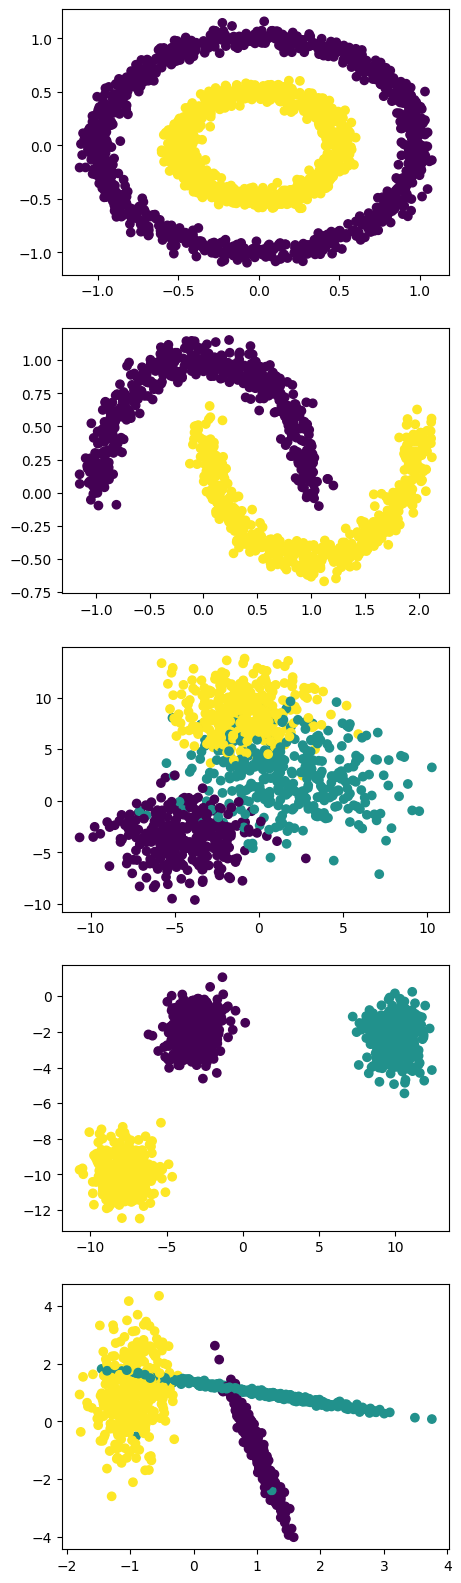

In [73]:
dataset_circles = Dataset('circles', n_samples=2000, n_features=2, factor=0.5, noise=0.05)
dataset_moons = Dataset('moons', n_samples=1000, n_features=2, shuffle=True, noise=0.07, random_state=None)
dataset_blobs_big = Dataset('blobs', n_samples=1000,n_features=2,centers=3,cluster_std=[2.0,3.0,2.0])
dataset_blobs_small = Dataset('blobs', n_samples=900,n_features=2,centers=3,cluster_std=[1, 1, 1])
dataset_lines = Dataset('lines', n_samples=1000,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,n_classes=3)

get_original_distribution(dataset_circles,
                          dataset_moons,
                          dataset_blobs_big,
                          dataset_blobs_small,
                          dataset_lines)

## Models

In [74]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [75]:
dict_models = {
    'kmeans': KMeans,
    'spectral': SpectralClustering,
    'kmeans-minibatch': MiniBatchKMeans,
    'agglomerative': AgglomerativeClustering,
    'birch': Birch,
    'dbscan': DBSCAN,
    'meanshift': MeanShift,
    'gaussianmixture': GaussianMixture,
    'standardscaler': StandardScaler
}

def test_per_dataset(model_name, dataset_name, **kwargs):
    Model = dict_models[model_name]

    if dataset_name == 'circles':
        dataset = dataset_circles
    elif dataset_name == 'moons':
        dataset = dataset_moons
    elif dataset_name == 'blobs_big':
        dataset = dataset_blobs_big
    elif dataset_name == 'blobs_small':
        dataset = dataset_blobs_small
    elif dataset_name == 'lines':
        dataset = dataset_lines

    if model_name == 'meanshift':
        proc = Model()
    elif model_name == 'dbscan':
        proc = Model(min_samples=dataset.n_classes, eps= 0.2)
    elif model_name == 'gaussianmixture':
        proc = Model(n_components=dataset.n_classes)
    else:
        proc = Model(n_clusters=dataset.n_classes)

    res = proc.fit_predict(dataset.X)
    plt.scatter(dataset.X[:,0], dataset.X[:,1], marker='o', c=res)

def test_model(model_name, **kwargs):
    plt.figure(figsize=(5, 20))

    plt.subplot(511)
    test_per_dataset(model_name, 'circles', **kwargs)
    plt.subplot(512)
    test_per_dataset(model_name, 'moons', **kwargs)
    plt.subplot(513)
    test_per_dataset(model_name, 'blobs_big', **kwargs)
    plt.subplot(514)
    test_per_dataset(model_name, 'blobs_small', **kwargs)
    plt.subplot(515)
    test_per_dataset(model_name, 'lines', **kwargs)

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

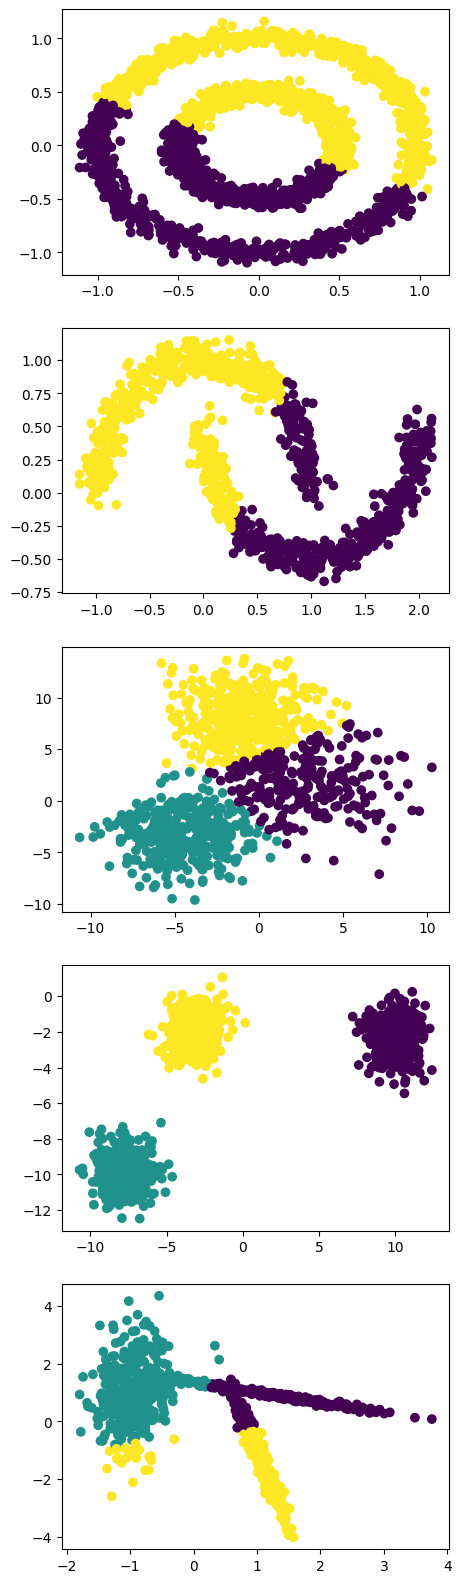

In [76]:
test_model('kmeans')

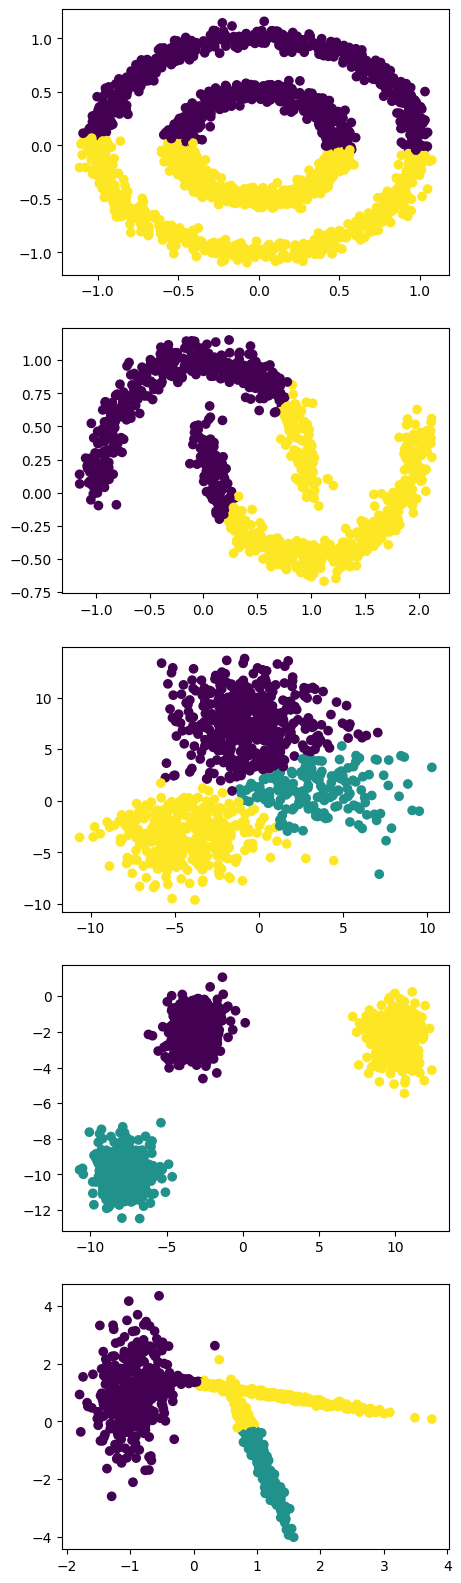

In [77]:
test_model('spectral')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

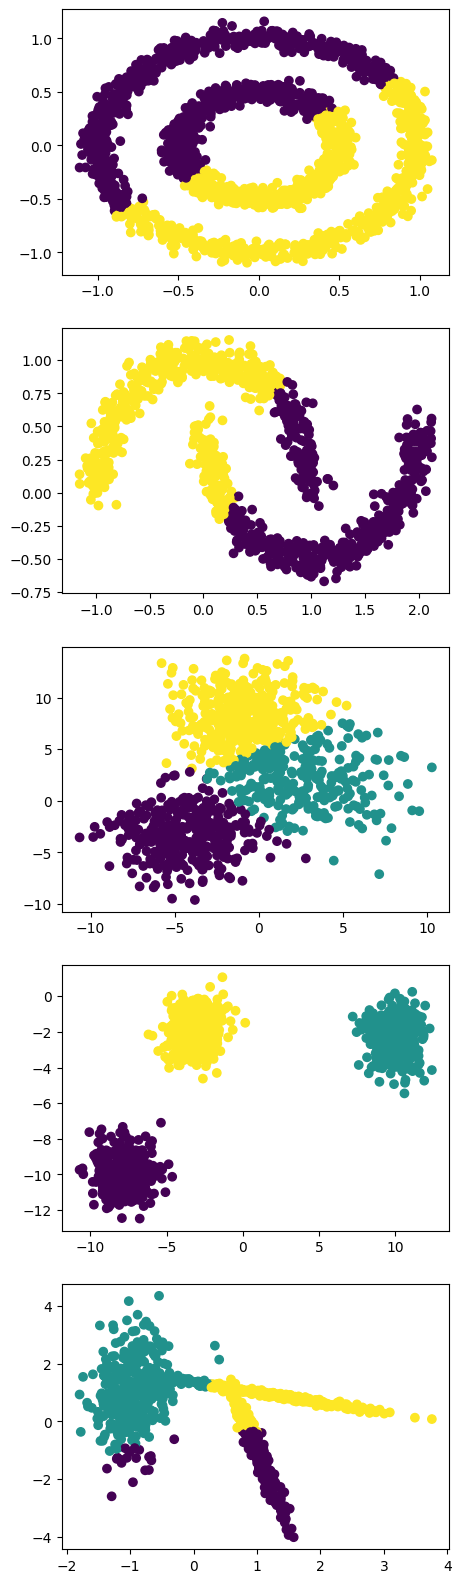

In [78]:
test_model('kmeans-minibatch')

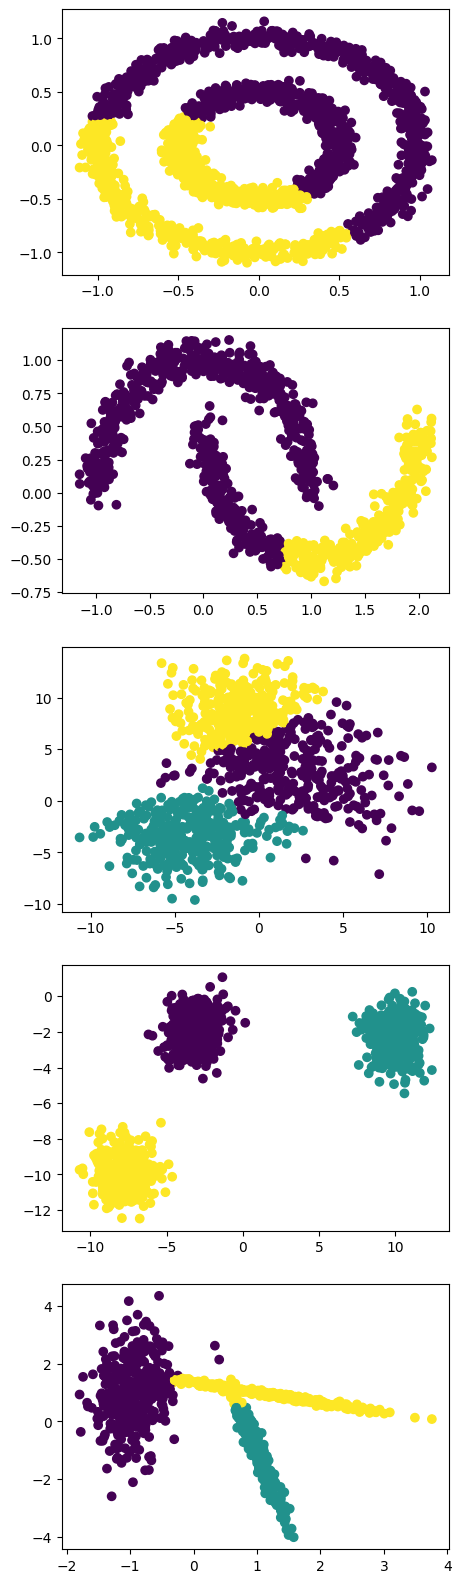

In [79]:
test_model('agglomerative')

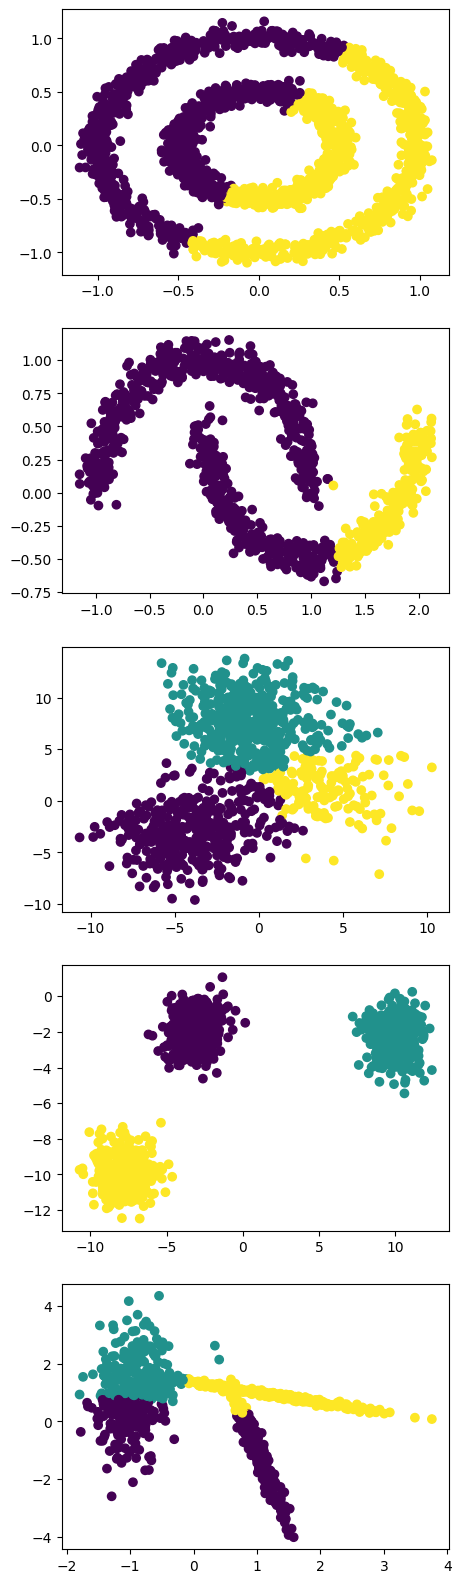

In [80]:
test_model('birch')

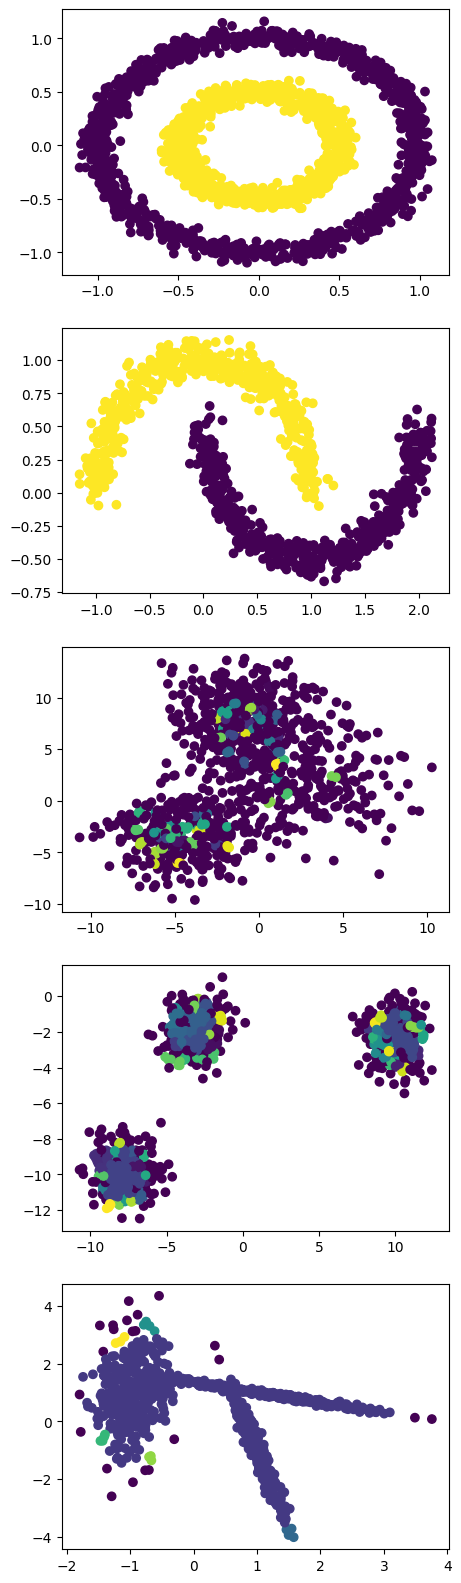

In [81]:
test_model('dbscan')

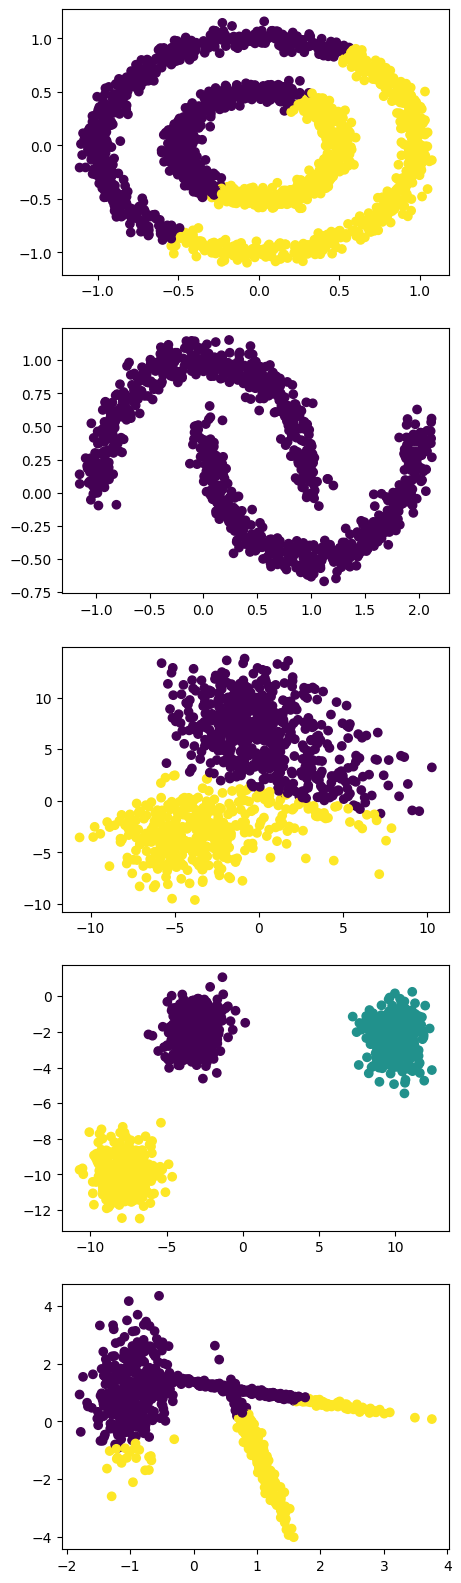

In [82]:
test_model('meanshift')

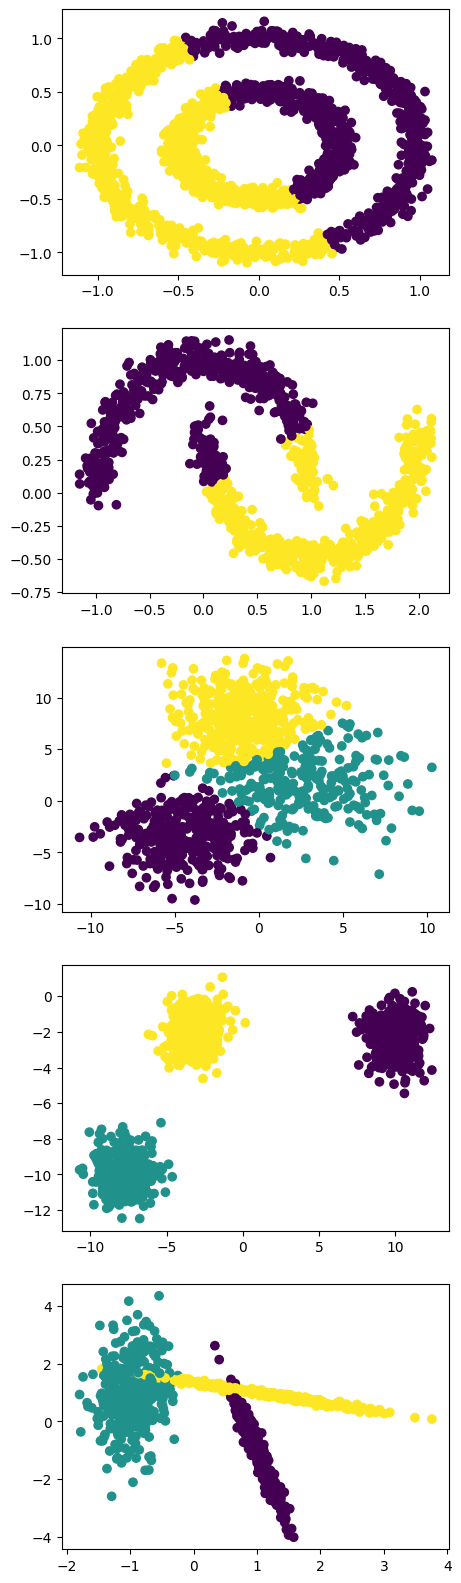

In [83]:
test_model('gaussianmixture')